In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scIB
from importlib import reload

In [2]:
default_fig_size = (8,8)
plt.rcParams['figure.figsize'] = default_fig_size

In [3]:
data_dir = 'data/'
integrated = {}
integrated['seurat']= sc.read(data_dir+'processed/04seurat_integrated_noprior.h5ad')
integrated['scanorama']= sc.read(data_dir+'processed/04scanorama_NOprior.h5ad')
integrated['scGen']= sc.read(data_dir+'processed/04scGen_noprior.h5ad')
integrated['mnn'] = sc.read(data_dir+'processed/04mnn.h5ad')
integrated['harmony'] = sc.read(data_dir+'processed/04harmony.h5ad')

In [4]:
for i in integrated.keys():
    print(i)
    scIB.preprocessing.reduce_data(integrated[i], hvg=False, pca=False, umap=True)
    sc.tl.louvain(integrated[i], resolution=0.5, key_added='louvain_post')

seurat
         Falling back to preprocessing with `sc.pp.pca` and default params.
scanorama
scGen
mnn
harmony


mean silhouette over label means: 0.15978030860424042
mean silhouette per cell: 0.20634715259075165
mean silhouette over label means: 0.15157070755958557
mean silhouette per cell: 0.16372011601924896
mean silhouette over label means: 0.3687025308609009
mean silhouette per cell: 0.43111109733581543
mean silhouette over label means: 0.2560182809829712
mean silhouette per cell: 0.2456079125404358
mean silhouette over label means: 0.46589360378980266
mean silhouette per cell: 0.5035611469579867


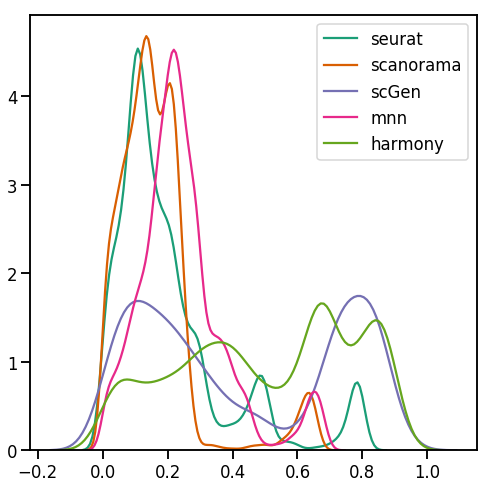

In [5]:
scIB.metrics.plot_silhouette_score(integrated)